# Python Homework 3

**Release date:** Saturday, May 9<br>
**Due date:** Friday, May 22, at midnight via <font color="blue">Gradescope</font> 

**Instruction:** Please upload your jupyter notebook on <font color="blue">Gradescope</font> with filename __PythonHW3_YOURPERMNUMBER.ipynb__.


Load some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 (10 Points)

1. Simulate three different paths (realizations) of a standard Brownian motion on $[0,1]$ and plot your results in one graph.

_Hint:_ Discretize the time interval $[0,1]$ in sufficiently small subintervals of same length with stepsize $1/n$, i.e., choose a sufficiently large number of steps $n$ (e.g., $n=10000$). 


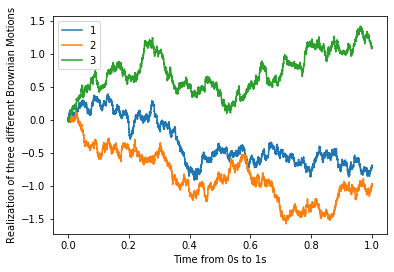

In [2]:
def BrownianSimulation(Start,End,n): # returns an array of Path(First index) and time(Second index) 
# time portion
    deltaT = (End)/n
    t = np.linspace(Start,End,num = n) # n intervals from 0s to 1s inclusive
#Bt portion
    deltaBts = np.array([0]) # start with 0
    deltaBts = np.append(deltaBts,np.random.normal(loc=0.0, scale=1.0, size=n-1))  #concat with an array of Zis
    deltaBts = np.sqrt(deltaT)* deltaBts # now an array of (deltaT)^0.5 * Zi except first one (which is zero)
# Note delta Bti = sqrt(deltaT) *Zi 
#Hence,by recursion  Bti = Bt0 + i * (deltaT)^0.5 * Zi where Bt0 = 0. To get this we use np.cumsum
    Bts = np.cumsum(deltaBts)
    return np.array([Bts,t])
    
PathOne = BrownianSimulation(0,1,10000)
PathTwo = BrownianSimulation(0,1,10000)
PathThree = BrownianSimulation(0,1,10000)
plt.plot(PathOne[1],PathOne[0])
plt.plot(PathTwo[1],PathTwo[0])

plt.plot(PathThree[1],PathThree[0])
plt.ylabel("Realization of three different Brownian Motions")
plt.xlabel("Time from 0s to 1s")
plt.legend("123")
plt.show()

2. A two-dimensional (standard) Brownian motion $(B_t)_{t \geq 0} = ((B^1_t, B^2_t))_{t \geq 0}$ with values in $\mathbb{R}^2$ is given by two one-dimensional $\mathbb{R}$-valued independent (standard) Brownian motions $(B^1_t)_{t \geq 0}$ and $(B^2_t)_{t \geq 0}$. Simulate a realization of a two-dimensional (standard) Brownian motion on the $\mathbb{R}^2$ plane for $t$ running from $0$ to $1$ and plot your result.

<i>Hint:</i> You can use your implementation from 1.

Text(0.5, 1.0, '$Brownian\\ Motion\\ In\\ \\mathbb{R}^2$')

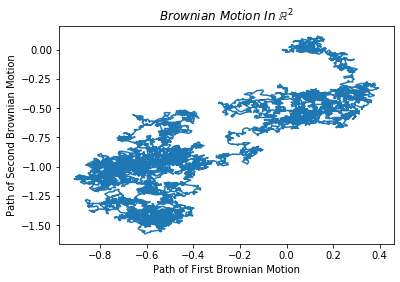

In [3]:
plt.plot(PathOne[0],PathTwo[0])
plt.xlabel("Path of First Brownian Motion")
plt.ylabel("Path of Second Brownian Motion")
plt.title(r'$Brownian\ Motion\ In\ \mathbb{R}^2$')

## Problem 2 (10 Points)

Let $(B_t)_{t \geq 0}$ be a standard Brownian motion. For $\mu \in \mathbb{R}$ and $\sigma \in \mathbb{R}_+$, the process $(X_t)_{t \geq 0}$ defined by 

$$ X_t = \mu t + \sigma B_t \qquad (t \geq 0)$$

is called __Brownian motion with drift parameter $\mu$ and variance parameter $\sigma^2$__. Moreover, the process $(S_t)_{t \geq 0}$ defined by 

$$ S_t = S_0 \cdot e^{X_t} \qquad (t \geq 0)$$

with starting value $S_0 > 0$ is called __geometric Brownian motion__.



1. Simulate a path of a geometric Brownian motion $(S_t)_{0 \leq t \leq T}$ with parameters $\mu = 0.1, \sigma = 0.176, S_0 = 1125$ on the time interval $[0,5/12]$ (i.e. $T=5/12$). Plot the result.

_Hint:_ Similar to Problem 1 above, discretize the time interval $[0,5/12]$ in sufficiently small subintervals of same length with stepzise $T/n$ (e.g., $n=10000$).  

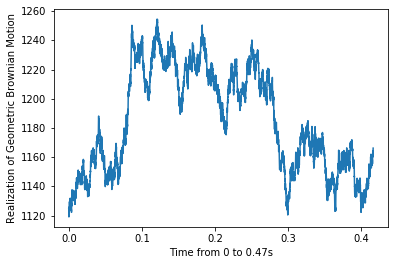

In [4]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!
def GeometricBrownian(mu,sigma,S0,start,end,n): # return an array of GBM path and time
    myBrownian = BrownianSimulation(start,end,n)
    Bt = myBrownian[0] # set Bt
    t = myBrownian[1] # Recall T at first function above is second index
    Xt = (mu * t) + (sigma * Bt) # First formula above
    St = S0 * np.exp(Xt) #Second formula above
    return np.array([St,t]) # returns an array of two arrays(first array is GBM path and second is time)
    
GBM = GeometricBrownian(0.1,0.176,1125,0,5/12,10000)
t = GBM[1]
GBM = GBM[0]
plt.plot(t,GBM)
plt.ylabel("Realization of Geometric Brownian Motion")
plt.xlabel("Time from 0 to 0.47s")
plt.show()


2. In the model introduced by Fisher Black, Myron Scholes, and Robert Merton (1973) for pricing so-called *stock options*, stock price processes are modeled as geometric Brownian motions. A stock option is a contract that gives the buyer of the option the right to receive a certain pre-determined payoff at a future point in time from the option's seller. Typically, the payoff depends on the future evolution of an underlying stock price: For example, a so-called *lookback option* on a stock with maturity $T=5/12$ pays the buyer of the option the payoff $$ S_{5/12} - \min_{t \, \in\, [0,5/12]} S_t$$ at time $T=5/12$, where $(S_t)_{t \geq 0}$ denotes the price process of the underlying stock. Find an approximation of the future expected payoff of this option by running 10000 simulations. Assume that the price follows a geometric Brownian motion with parameters as given in 1.

In [5]:
myarray = np.array([])
for i in range(10000):
    GBM = GeometricBrownian(0.1,0.176,1125,0,5/12,10000)[0]
    myarray = np.append(myarray,GBM[-1]-np.amin(GBM)) # S5/12 - minimum of St for each simulation
print("The payoff is " + str(np.round(np.mean(myarray),3)))


The payoff is 131.162
